# Практическое задание №2. 
## Реализация логистической регрессии с градиентным спуском.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(z):
    """Функция вычисления сигмоиды"""
    return 1 / (1 + np.exp(-z))

### Реализовать функцию log_loss(w, X, y), которая:
    * Вычисляет логистическую функцию (sigmoid) для предсказаний.
    * Вычисляет логистическую функцию потерь (log loss).
    * Вычисляет градиент функции потерь по параметрам модели.

In [3]:
def log_loss(
        w: np.ndarray, 
        X: np.ndarray, 
        y: np.ndarray
) -> tuple[float, np.ndarray]:
    """
    Расчет параметров градиента и значения функции потерь.
    
    :param w: Коэффициенты модели.
    :param X: Матрица признаков.
    :param y: Истинные метки класса.

    Возвращает:
    :return: Значение функции потерь, 
        градиент функции потерь относительно весов
    """
    z = np.dot(X, w)
    h = sigmoid(z)
    epsilon = 1e-8  # добавляем маленькую константу для численной стабильности
    loss = -(
        np.mean(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon)))
    grad = np.dot((h - y).T, X) / len(y)
    return loss, grad

### Реализовать функцию optimize(w, X, y, n_iterations, eta), которая:
    * Обновляет веса с использованием градиентного спуска.
    * Записывает значение функции потерь на каждой итерации для дальнейшего анализа.

In [4]:
def optimize(
        w: np.ndarray,
        X: np.ndarray,
        y: np.ndarray,
        n_iterations: int,
        eta: float
) -> tuple[np.ndarray, list[float]]:
    """
    Оптимизация весов методом градиентного спуска.
    
    :param w: Начальные коэффициенты модели.
    :param X: Матрица признаков.
    :param y: Истинные метки класса.
    :param n_iterations: Количество итераций градиентного спуска.
    :param eta: Скорость обучения.

    :return: Оптимизированные веса и список значений функции потерь.
    """
    loss_values = []
    for _ in range(n_iterations):
        loss, grad = log_loss(w, X, y)
        w -= eta * grad
        loss_values.append(loss)
    return w, loss_values

### Реализовать функцию predict(w, X, b=0.5), которая:
    * Вычисляет вероятности классов с помощью сигмоиды.
    * Присваивает класс 1, если вероятность выше порога b=0.5, иначе — 0.

In [5]:
def predict(w: np.ndarray, X: np.ndarray, b: float=0.5) -> np.ndarray:
    """
    Предсказания модели.
    
    :param w: Весовая матрица модели.
    :param X: Матрица признаков.
    :param b: Порог классификации.
    
    :return: Массив предсказанных классов.
    """
    probabilities = sigmoid(np.dot(X, w))
    # Преобразуем вероятности в бинарные метки:
    y_pred = (probabilities >= b).astype(int)
    return y_pred

### Запустить эксперимент:
    * Создать случайные данные X и Y.
    * Обучить модель на данных.
    * Построить график изменения функции потерь.
    * Оценить качество предсказаний, сравнив их с истинными значениями Y.

Генерация случаныйх данных:

In [6]:
np.random.seed(42)
X = np.random.randn(100, 2)
y = np.where(X[:, 0]*X[:, 1]>0, 1, 0)

Запуск эксперимента:

In [7]:
def experiment(eta: float, iterations: int) -> tuple[np.ndarray, list[float]]:
    """
    Запуск эксперимента.

    :param eta: скорость обучения;
    :param iterations: число итераций.
    """
    X_with_bias = np.c_[np.ones(len(X)), X]
    w_initial = np.zeros(X_with_bias.shape[1])
    _final_weights, _losses = optimize(w_initial, X_with_bias, y, iterations, eta)
    predictions = predict(_final_weights, X_with_bias)
    accuracy = np.mean(predictions == y)
    print(f"Точность модели: {accuracy:.2f}")
    return _final_weights, _losses

In [8]:
iterations = 100

In [9]:
final_weights, losses = experiment(0.1, iterations)

Точность модели: 0.66


График изменений функции потерь:

In [10]:
def plot_change_in_loss(_iterations: int, _losses: list[float], figsize: tuple[int, int] = (10, 6)) -> None:
    """
    Построение графика изменения значения функции потерь.
    
    :param _iterations: Количество итераций.
    :param _losses: Список значений функции потерь.
    :return: None.
    """
    plt.figure(figsize=figsize)
    plt.plot(range(_iterations), _losses, label='Log Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss Value')
    plt.title('Изменение значения функции потерь')
    plt.legend()
    plt.show()

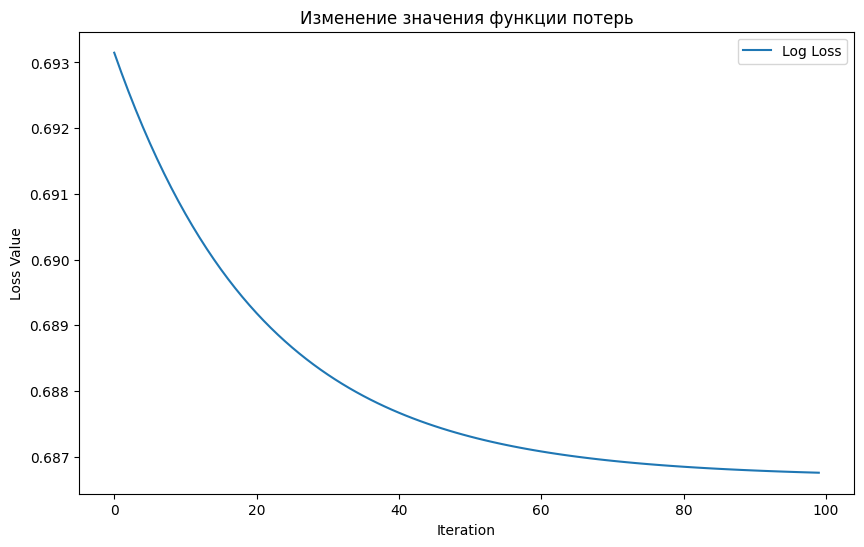

In [11]:
plot_change_in_loss(iterations, losses)

Оценка качества предсказаний:

## Дополнительные вопросы

### Как влияет размер шага eta на сходимость алгоритма?


iterations=100; eta=0.05:
Точность модели: 0.66


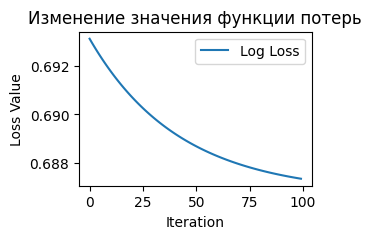


iterations=100; eta=0.1:
Точность модели: 0.66


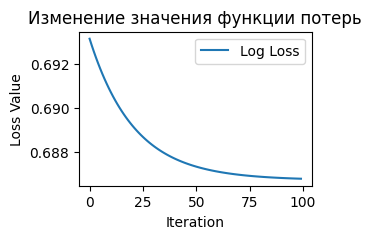


iterations=100; eta=0.2:
Точность модели: 0.66


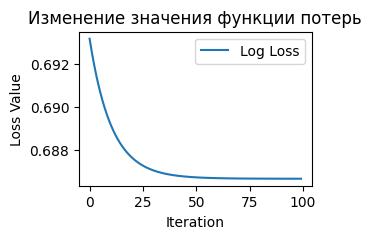


iterations=100; eta=0.4:
Точность модели: 0.66


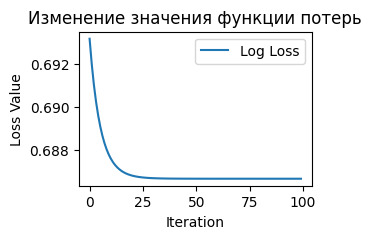


iterations=100; eta=0.8:
Точность модели: 0.66


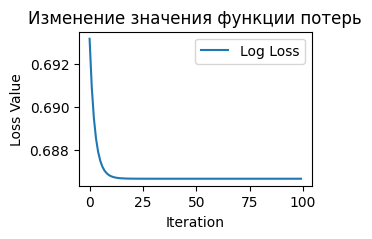

In [12]:
eta_values = [0.05, 0.1, 0.2, 0.4, 0.8]
for eta in eta_values:
    print(f"\niterations={iterations}; eta={eta}:")
    final_weights, losses = experiment(eta, iterations)
    plot_change_in_loss(iterations, losses, (3, 2))

Размер шага определяет скорость движения к точке минимума в градиентном спуске. Малый шаг замедляет обучение, но обеспечивает стабильность и точную сходимость. Большой шаг ускоряет обучение, но повышает риск перескочить минимум и ухудшить результат. Оптимальным считается компромиссный вариант, подобранный индивидуально для конкретной задачи.

### Что произойдет, если выбрать слишком маленькое или слишком большое количество итераций n_iterations?


iterations=20; eta=0.1:
Точность модели: 0.66


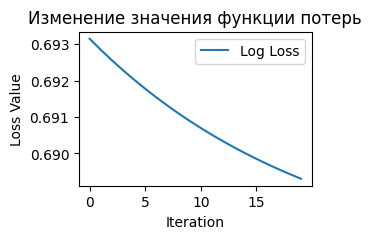


iterations=50; eta=0.1:
Точность модели: 0.66


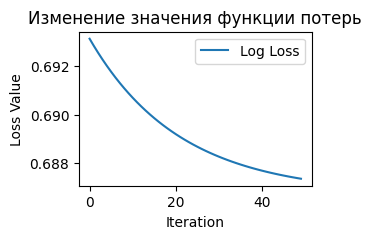


iterations=100; eta=0.1:
Точность модели: 0.66


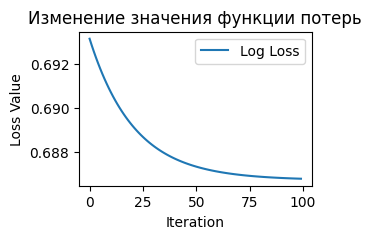


iterations=150; eta=0.1:
Точность модели: 0.66


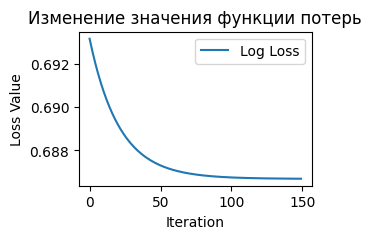


iterations=200; eta=0.1:
Точность модели: 0.66


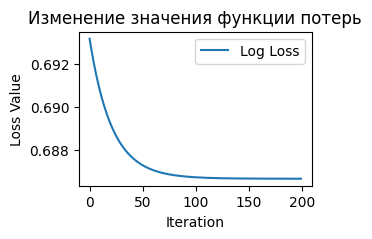

In [13]:
eta = 0.1
iterations_values = [20, 50, 100, 150, 200]
for iterations in iterations_values:
    print(f"\niterations={iterations}; eta={eta}:")
    final_weights, losses = experiment(eta, iterations)
    plot_change_in_loss(iterations, losses, (3, 2))

При недостаточном количестве итераций модель недостаточно учится и даёт плохие прогнозы (недообучение). При чрезмерном числе итераций модель начинает адаптироваться слишком точно к данным обучения, теряя способность обобщать (перенасыщение). Важно подобрать оптимальное количество итераций, останавливаясь, пока ошибка на контрольных данных улучшается.

### Почему логистическая регрессия подходит для задач только бинарной классификации?

Логистическая регрессия предназначена именно для бинарной классификации потому, что она выводит вероятности принадлежности к одному из двух классов (обычно обозначаемых как 0 и 1). Её целевая переменная принимает всего два возможных значения, а выходной сигнал модели интерпретируется как вероятность принадлежности к положительному классу (класс 1). Эта особенность делает логистическую регрессию эффективной для задач типа "есть класс или нет", но ограничивает её применение в ситуациях многоклассовой классификации.